<a href="https://colab.research.google.com/github/samyumobi/Car-scratch-object-detection-model/blob/main/car_damage_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Read data path and check files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data_path = "/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/train/"
test_data_path = "/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/test/"
valid_data_path = "/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/"

In [4]:
import glob
#print(glob.glob(str(train_data_path)+'/*.jpg'))
#back_light-1---83-_jpg.rf.829f6df0f7e1032fac163a84da29a75e.jpg
#sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg

size of image (h x w) 640 640


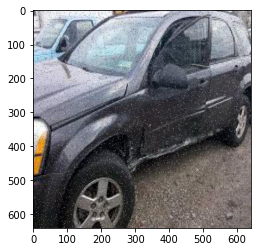

In [5]:
# looking into the the data
img = plt.imread(os.path.join(train_data_path, "0118_JPEG.rf.29e679636575003fa9eb7a39b4040d8e.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

size of image (h x w) 640 640


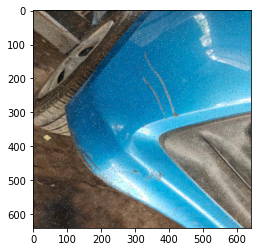

In [6]:
# looking into the the data
img = plt.imread(os.path.join(train_data_path, "1--1-_jpeg.rf.62f331d25cc13d269afeda0e08f51ad5.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

In [7]:
train_data_path

'/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/train/'

# Load images data

In [8]:

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

train_dataset = train.flow_from_directory(directory = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco',classes = ['train']
                                         ,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')
                                         
test_dataset = test.flow_from_directory(directory = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco',classes = ['test']
                                       ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

valid_dataset = test.flow_from_directory(directory = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco',classes = ['valid']
                                        ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary',
        shuffle=True)

Found 754 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 390 images belonging to 1 classes.


# Train model

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
# dimensions of our images.
img_width, img_height = 640, 640



model = Sequential()
model.add(Convolution2D(32, (3, 3),padding='same',input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 640, 32)      896       
                                                                 
 activation (Activation)     (None, 640, 640, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 320, 320, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 318, 318, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 318, 318, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 159, 159, 32)     0         
 2D)                                                    

In [11]:
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
history = model.fit(train_dataset, 
                    validation_data=test_dataset,
                    epochs=64,
                    callbacks=[earlystop,modelcheck],
                    batch_size=32)



Epoch 1/64
24/24 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9801
Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to best_model.hdf5
24/24 [==============================] - 52s 2s/step - loss: 0.0294 - accuracy: 0.9801 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/64
24/24 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00002: val_accuracy did not improve from 1.00000
24/24 [==============================] - 17s 669ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 00002: early stopping


In [12]:
model.save('car_model.hdf5')

In [13]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True, to_file='model.png')

# Evaluate the model

In [14]:
print('Test accuracy achieved', history.history['val_accuracy'][-2])

Test accuracy achieved 1.0


In [15]:
model.evaluate_generator(generator=valid_dataset,steps=32)
# model.evaluate(generator=valid_dataset,steps=64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0, 1.0]

# Predict the output

In [16]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=128,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


128/128 [==============================] - 1s 9ms/step


In [17]:
predicted_class_indices

# 0 = car damage

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:

labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#save predictions to results file
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate Model Output

In [32]:
#Check data in validation dataset
import glob
print(glob.glob(str(valid_data_path)+'/*.jpg'))

['/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/11_jpeg.rf.2a13b0d994e1fa1d95bf7f0292680f36.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/1521512941709--1-_jpg.rf.3acf1e6dd65be1cb4fe88d56759024c5.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/15b654e78bcf27d9d8fcec49d8524f5403000dd0--1-_jpg.rf.abb26cd1e0996d9c501347ce847159e1.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/17_jpeg.rf.482e834e083b0c3b9bada20c046c231d.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/1_jpeg.rf.e50d9b86c2a17747f99ccaf8cf55c245.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/1_jpg.rf.6cc41989e29fc63878c56fd4e08e6cc9.jpg', '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/22_jpeg.rf.11b25fd9d44b2f4fb4aa66a31a9b3e06.jpg', '/content/drive/MyDrive/car_dent_coco.zip (U

[[0.]]


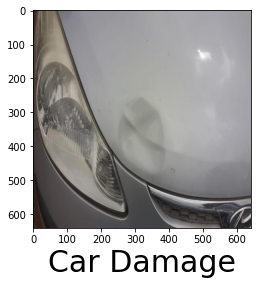

In [20]:
# Our predict function
def predictImage(filename):
    
    img = image.load_img(filename)
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)
        
        
u = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/11_jpeg.rf.2a13b0d994e1fa1d95bf7f0292680f36.jpg'
predictImage(u)

[[0.]]


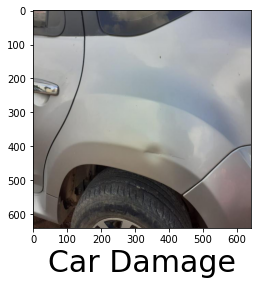

In [34]:
u = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/17_jpeg.rf.482e834e083b0c3b9bada20c046c231d.jpg'
predictImage(u)

[[0.]]


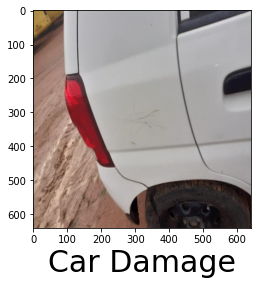

In [37]:
u = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/6--1-_jpeg.rf.81ff429e14d467f82f38468f96e21eaf.jpg'
predictImage(u)

[[0.]]


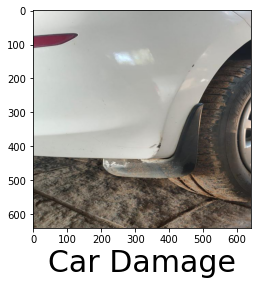

In [36]:
u = '/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/25_jpeg.rf.7d6a010838584cb14aaa1d883d1e8a86.jpg'
predictImage(u)

# StreamLit Web app


In [21]:
!pip install --upgrade streamlit
!pip install streamlit
!pip install pyngrok
!pip install ipykernel>=5.1.2
!pip install pydeck
!pip install --upgrade ipykernel

     |████████████████████████████████| 9.2 MB 5.3 MB/s 
     |████████████████████████████████| 111 kB 50.0 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 164 kB 42.7 MB/s 
     |████████████████████████████████| 4.3 MB 36.2 MB/s 
     |████████████████████████████████| 180 kB 21.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 126 kB 36.0 MB/s 
     |████████████████████████████████| 791 kB 47.2 MB/s 
     |████████████████████████████████| 374 kB 44.4 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=2a3eeffe89d24d92d307cb4ea78f25502bfd5f51a236fa50a088ac83659e4beb
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

     |████████████████████████████████| 745 kB 5.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=279b1f69b4e9e609208bcec04e0f3da648bca39f9448325598b2f2e7cf090597
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [22]:
%%writefile app.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)

import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
def import_and_predict(image_data, model):
    
        size = (150,150) 
        image = ImageOps.fit(image_data)
        image = np.asarray(image)
        image = (image.astype(np.float32) / 255.0)

        img_reshape = image[np.newaxis,...]

        prediction = model.predict(img_reshape)
        
        return prediction
    
model = tf.keras.models.load_model('car_model.hdf5')

st.write("""
         # Car Damage Detection
         """
         )
st.write("This is a simple image classification web app to predict damage")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])    
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)
    
    if np.argmax(prediction) < 0.5:
        st.write("Car Damage!")
    elif np.argmax(prediction) >= 0.5:
        st.write("Car Not Damage!")
    
    
    st.text("Probability (0: Car_Damage, 1: Car_Not_Damage")
    st.write(prediction)

Writing app.py


In [23]:
# run the app on local system
!streamlit run app.py &>/dev/null&

In [24]:
# A url is created to host the app
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://2c42-35-194-35-114.ngrok.io" -> "http://localhost:80">

In [25]:
# shutdown the app
!pgrep streamlit
ngrok.kill()

2329


In [26]:
# run streamlit on local system
# !streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]

# !streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS] --server.enableWebsocketCompression=false --server.enableXsrfProtection=false  --server.port=8888

# Deploy model with Flask

In [27]:
# import os
# import numpy as np
# import pandas as pd
# from PIL import Image
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# from flask import Flask, render_template, request
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import img_to_array

# app = Flask(__name__)

# def get_model():
#     global model
#     model = load_model('car_model.hdf5')
#     print("Model loaded!")

# def load_image(img_path):

#     img = image.load_img(img_path)
#     img_tensor = image.img_to_array(img)                    # (height, width, channels)
#     img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
#     img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

#     return img_tensor

# def prediction(img_path):
#     new_image = load_image(img_path)
    
#     pred = model.predict(new_image)
    
#     print(pred)
    
#     labels=np.array(pred)
#     labels[labels>=0.6]=1
#     labels[labels<0.6]=0
    
#     print(labels)
#     final=np.array(labels)
    
#     if final[0][0]==1:
#         return "Damaged Car"
#     else:
#         return "Non Damaged Car"

# get_model()

Model loaded!


In [28]:
# from flask import Flask, request, render_template,jsonify
# @app.route("/", methods=['GET', 'POST'], endpoint='func')
# def home():

#     return render_template('home.html')

# @app.route("/predict", methods = ['GET','POST'], endpoint='func2')
# def predict():
    
#     if request.method == 'POST':
        
#         file = request.files['file']
#         filename = file.filename
#         file_path = os.path.join(r'/content/drive/MyDrive/car_dent_coco.zip (Unzipped Files)/car_dent_coco/valid/', filename)  #slashes should be handeled properly
#         file.save(file_path)
#         print(filename)
#         product = prediction(file_path)
#         print(product)
        
#     return render_template('predict.html', product = product, user_image = file_path)   #file_path can or may used at the place of filename



# if __name__ == "__main__":
#     # app.run()
#     app.run(port=5000,debug=True)

# References

*    [Tutorial-image-classification-with-keras-flow-from-directory-and-generators](https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

* [Model deployment using streamlit on Colab ](https://medium.com/@jcharistech/how-to-run-streamlit-apps-from-colab-29b969a1bdfc)